# Not using spaCy

### Use RegEx

Create a function to clean tweets such as lowering, removing any URLs, replacing hashtags and trimming 

In [53]:
import re

def processTweet(tweet):
    #Convert to lower case
    tweet = tweet.lower()
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Eliminate hastags
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    return tweet

In [55]:
#example
processTweet('Greatest entertainer of our generation #MOTWTour')

'greatest entertainer of our generation motwtour'

In [56]:
from nltk.tokenize import RegexpTokenizer

In [57]:
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
df['text_cleaned'] = df['text'].map(lambda x: tokenizer.tokenize(x))

After splitting for each word in the tweet, we lemmatize the tweets

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
df['text_lemm'] = df['text_cleaned'].map(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

In [ ]:
df['char_count'] = df['text_lemm'].map(len)
df['word_count'] = df['text_lemm'].map(lambda x: len(x.split()))

# Using spaCy

Each word becomes a feature/dimension for our data while each tweet becomes a document/sample. We need to measure the distance between tweets to cluster samples.

#### Sample Tweets:
Greatest entertainer of our generation #MOTWTour <br>
Had the most amazing night. This man is incredible 💗 #MOTWTour <br>

In [29]:
import matplotlib.pyplot as plt
import spacy
import pandas as pd
import seaborn as sns
sns.set()

%matplotlib inline

In [4]:
! python -m spacy download en

    100% |████████████████████████████████| 37.4MB 19.1MB/s 
  Running setup.py install for en-core-web-sm ... done

    Linking successful
    /Users/mintaekhong/anaconda3/lib/python3.7/site-packages/en_core_web_sm
    -->
    /Users/mintaekhong/anaconda3/lib/python3.7/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [7]:
! python -m spacy download en_core_web_sm


    Linking successful
    /Users/mintaekhong/anaconda3/lib/python3.7/site-packages/en_core_web_sm
    -->
    /Users/mintaekhong/anaconda3/lib/python3.7/site-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')



In [4]:
nlp = spacy.load('en_core_web_sm')

In [11]:
doc = nlp(u'Apple is looking at buying U.K. startup for $1 billion')
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

Apple apple PROPN NNP nsubj Xxxxx True False
is be VERB VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. u.k. PROPN NNP compound X.X. False False
startup startup NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


Text: The original word text. <br>
Lemma: The base form of the word. <br>
POS: The simple part-of-speech tag. <br>
Tag: The detailed part-of-speech tag. <br>
Dep: Syntactic dependency, i.e. the relation between tokens. <br>
Shape: The word shape – capitalisation, punctuation, digits. <br>
is alpha: Is the token an alpha character? <br>
is stop: Is the token part of a stop list, i.e. the most common words of the language?

### Named Entities 

A named entity is a 'real-world object' that's assigned a name - i.e. a person, country, product or book title; spaCy can recognize various types of named entities in a document by asking a model for a prediction

basically understands real world things and asks the model for a prediction

In [12]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


Text: The original entity text. <br>
Start: Index of start of entity in the Doc. <br>
End: Index of end of entity in the Doc. <br>
Label: Entity label, i.e. type. <br>

### Word vectors and similarity

Can compare two bojects and make prediction of their similarity (useful for recommender system); can use this to compare if people are talking about similar things in their tweets

In [16]:
for token1 in tokens:
    print (token1)

dog
cat
banana
afskfsd


In [7]:
tokens = nlp(u'Greatest entertainer of our generation #MOTWTour')

for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

Greatest Greatest 1.0
Greatest entertainer 0.15549152
Greatest of -0.15772358
Greatest our -0.019344667
Greatest generation 0.12072607
Greatest # 0.059041154
Greatest MOTWTour -0.006385423
entertainer Greatest 0.15549152
entertainer entertainer 1.0
entertainer of 0.070534796
entertainer our 0.025099112
entertainer generation 0.3599029
entertainer # 0.11870659
entertainer MOTWTour 0.06623884
of Greatest -0.15772358
of entertainer 0.070534796
of of 1.0
of our -7.6853474e-05
of generation -0.10111474
of # -0.18316521
of MOTWTour -0.037120327
our Greatest -0.019344667
our entertainer 0.025099112
our of -7.6853474e-05
our our 1.0
our generation 0.090753004
our # -0.016377835
our MOTWTour 0.24071787
generation Greatest 0.12072607
generation entertainer 0.3599029
generation of -0.10111474
generation our 0.090753004
generation generation 1.0
generation # 0.30969307
generation MOTWTour 0.30249688
# Greatest 0.059041154
# entertainer 0.11870659
# of -0.18316521
# our -0.016377835
# generation 0.

In [9]:
tokens = nlp(u'Greatest entertainer of our generation #MOTWTour') ##by calling nlp on a text, spaCy tokenizes the text and produces a Doc object

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

Greatest True 22.379702 True
entertainer True 25.166908 True
of True 25.36524 True
our True 26.95757 True
generation True 25.843142 True
# True 21.032915 True
MOTWTour True 22.959383 True


Text: The original token text. <br>
has vector: Does the token have a vector representation? <br>
Vector norm: The L2 norm of the token's vector (the square root of the sum of the values squared) <br>
OOV: Out-of-vocabulary

### **From https://www.kaggle.com/nirant/hitchhiker-s-guide-to-nlp-in-spacy :**

Use for loop to tokenize/vectorize through column by using nlp()...

In [50]:
doc = nlp('Greatest entertainer of our generation #MOTWTour')

In [51]:
doc

Greatest entertainer of our generation #MOTWTour

In [10]:
def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [11]:
explain_text_entities('Greatest entertainer of our generation #MOTWTour')

Entity: MOTWTour, Label: MONEY, Monetary values, including unit


In [15]:
# text = tweets['text'].str.cat(sep = ' ')

In [16]:
text = 'Greatest entertainer of our generation #MOTWTour'

In [19]:
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)
hastag_reg = r'#'
text = re.sub(hastag_reg, '', text)

In [20]:
text

'Greatest entertainer of our generation MOTWTour'

In [ ]:
jt_topics = []
for ent in doc.ents:
    if ent.label_ not in ['PERCENT', 'CARDINAL', 'DATE']:
        jt_topics.append(ent.text.strip())

In [21]:
doc = nlp(text)

In [25]:
items_of_interest = list(doc.noun_chunks)
# each element in this list is spaCy's inbuilt `Span`, which is not useful for us
items_of_interest = [str(x) for x in items_of_interest]
# so we've converted it to string

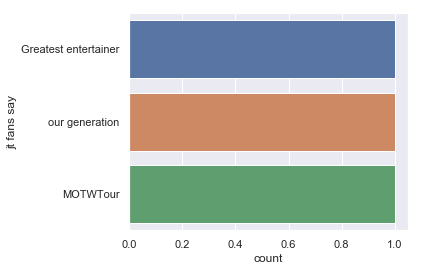

In [31]:
df_nouns = pd.DataFrame(items_of_interest, columns=["jt fans say"])
plt.figure(figsize=(5,4))
sns.countplot(y="jt fans say",
             data=df_nouns,
             order=df_nouns["jt fans say"].value_counts().iloc[:10].index)
plt.show()
##need more tweets

In [ ]:
tokens = nlp(u'dog cat banana afskfsd') 
##by calling nlp on a text, spaCy tokenizes the text and produces a Doc object
#Then, goes thru processing pipeline of 'tagger', 'parser', 'ner'; each pipeline component returns the processed Doc, which is then passed on to next component

'tag': assigns part of speech tags; <br>
'parser': assigns dependency labels; <br> 
'ner': named entity recognizer; <br> 'textcat': assigns document labels

We need to specify the pipeline to use in the meta data!

In [20]:
pipeline: ['tagger', 'parser', 'ner'] ##order and combination matters

Need to determine which pipelines we want to add to our data grows exponentially with each additional pipeline.

https://github.com/belencito27/Map_Disasters_Twitter/blob/master/EDA_Tweets_Huricane_Flo.ipynb